In [9]:
%pip install networkx matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Example data: highest and lowest matches for each user
user_data = {
    'Mae': {'highest': ('Abet', 90), 'lowest': ('Christian', 51)},  # done
    'Jericho': {'highest': ('KC', 93), 'lowest': ('Christian', 59)},  # done
    'Daniel': {'highest': ('Brian', 92), 'lowest': ('Abet', 66)},  # done
    'Christian': {'highest': ('Daniel', 87), 'lowest': ('Abet', 47)},
    # 'Abet': {'highest': ('UserA', 90), 'lowest': ('UserC', 70)},
    # 'KC': {'highest': ('UserA', 90), 'lowest': ('UserC', 70)},
    'Jehu': {'highest': ('Brian', 91), 'lowest': ('Christian', 70)},  # done
    # 'Brian': {'highest': ('UserA', 90), 'lowest': ('UserC', 70)},
    'Audric': {'highest': ('Jericho', 90), 'lowest': ('Christian', 62)},  # done
    'Jima': {'highest': ('Brian', 78), 'lowest': ('Audric', 58)},  # done
}

C:\Users\Jericho\AppData\Local\Temp\ipykernel_34460\2036019762.py:52: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color=[color])
C:\Users\Jericho\AppData\Local\Temp\ipykernel_34460\2036019762.py:56: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color=[color])


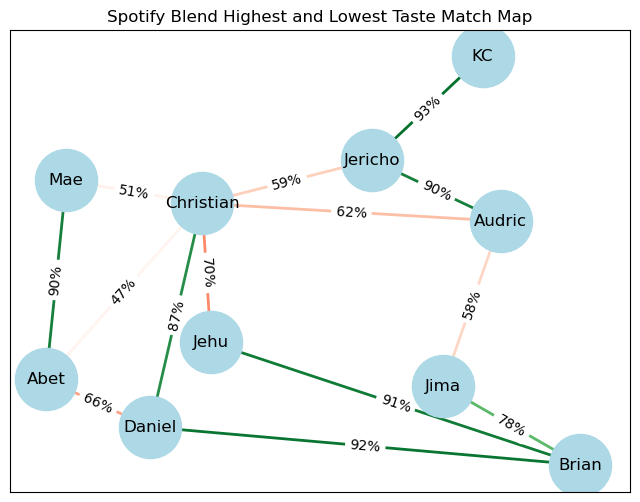

In [132]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def enforce_min_distance(pos, min_dist):
    keys = list(pos.keys())
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            key_i, key_j = keys[i], keys[j]
            dist = np.linalg.norm(pos[key_i] - pos[key_j])
            if dist < min_dist:
                move_vector = pos[key_i] - pos[key_j]
                move_vector = move_vector / np.linalg.norm(move_vector) * (min_dist - dist) / 2
                pos[key_i] += move_vector
                pos[key_j] -= move_vector
    return pos

def draw_graph_with_min_distance(min_dist):
    G = nx.Graph()

    # Add nodes and edges
    for user, matches in user_data.items():
        highest_match_user, highest_score = matches['highest']
        lowest_match_user, lowest_score = matches['lowest']
        G.add_edge(user, highest_match_user, weight=highest_score, type='highest')
        G.add_edge(user, lowest_match_user, weight=lowest_score, type='lowest')

    # Use a fixed seed for the layout algorithm to get consistent positions
    pos = nx.spring_layout(G)

    # Enforce minimum distance
    pos = enforce_min_distance(pos, min_dist)

    # Get edge weights and types
    edges = G.edges(data=True)
    highest_weights = [(u, v, data['weight']) for u, v, data in edges if data['type'] == 'highest']
    lowest_weights = [(u, v, data['weight']) for u, v, data in edges if data['type'] == 'lowest']

    # Normalize weights to [0, 1] for colormap
    norm = plt.Normalize(50, 100)  # Assuming percentages range from 50 to 100
    cmap_highest = plt.get_cmap('Greens')  # Green for highest matches
    cmap_lowest = plt.get_cmap('Reds')  # Red for lowest matches

    plt.figure(figsize=(8, 6))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)

    # Draw edges with colors based on weights
    for u, v, weight in highest_weights:
        color = cmap_highest(norm(weight))
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color=[color])

    for u, v, weight in lowest_weights:
        color = cmap_lowest(norm(weight))
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color=[color])

    # Draw labels
    nx.draw_networkx_labels(G, pos)

    # Draw edge labels, adjusting the position to avoid overlapping with nodes
    edge_labels = {(u, v): f"{data['weight']}%" for u, v, data in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5)

    # Show the plot
    plt.title("Spotify Blend Highest and Lowest Taste Match Map")
    plt.show()

# Specify minimum distance and draw graph
min_distance = 1  # Adjust this value as needed
draw_graph_with_min_distance(min_distance)
